In [1]:
!ls

'Calculate metrics.ipynb'	   queries_res_no_headers_marked.csv
'Calculate predictions.ipynb'	   queries_res_with_names.csv
'Check NER correspondence.ipynb'   Querries.csv
'Check UNK correspondence.ipynb'   Querries.v2.csv
 no_headers_stat.csv		   with_headers_stat2.csv
 queries_res2.csv		   with_headers_stat.csv
 queries_res2_marked.csv	   with_headers_stat_ner.csv
 queries_res.csv		   with_headers_stat_unk.csv
 queries_res_no_headers.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('with_headers_stat2.csv', index_col='Unnamed: 0')
df.head()

Query  top1_dist  \
0             British rock   0.283977   
1         Riemann integral   0.016512   
2                 Integral   0.015928   
3    Differentiation rules   0.015038   
4  Continuous bag of words   0.334625   

                                           top1  top1_rel  top2_dist  \
0  https://en.wikipedia.org/wiki?curid=30637650         1   0.299541   
1     https://en.wikipedia.org/wiki?curid=26390         2   0.087361   
2     https://en.wikipedia.org/wiki?curid=15532         2   0.015928   
3  https://en.wikipedia.org/wiki?curid=10308785         2   0.136908   
4  https://en.wikipedia.org/wiki?curid=21784490         0   0.365514   

                                           top2  top2_rel  top3_dist  \
0    https://en.wikipedia.org/wiki?curid=425492         0   0.304202   
1  https://en.wikipedia.org/wiki?curid=12314844         1   0.114044   
2   https://en.wikipedia.org/wiki?curid=1529187         2   0.090665   
3     https://en.wikipedia.org/wiki?curid=61335         2   0.146164   
4  https://en.wikipedia.org/wiki?curid=11633687         0   0.376075   

                                           top3  top3_rel  top4_dist  \
0  https://en.wikipedia.org/wiki?curid=29406798         0   0.306770   
1    https://en.wikipedia.org/wiki?curid=176478         1   0.116290   
2  https://en.wikipedia.org/wiki?curid=61253455         1   0.103952   
3  https://en.wikipedia.org/wiki?curid=13479905         1   0.150099   
4   https://en.wikipedia.org/wiki?curid=4013888         0   0.398350   

                                           top4  top4_rel  top5_dist  \
0   https://en.wikipedia.org/wiki?curid=2414799         1   0.310063   
1  https://en.wikipedia.org/wiki?curid=19344125         1   0.128624   
2   https://en.wikipedia.org/wiki?curid=9478630         1   0.113608   
3  https://en.wikipedia.org/wiki?curid=10265555         1   0.199049   
4     https://en.wikipedia.org/wiki?curid=88699         0   0.405603   

                                           top5  top5_rel      ndcg    pfound  
0  https://en.wikipedia.org/wiki?curid=29421430         0  0.161743  0.228301  
1    https://en.wikipedia.org/wiki?curid=567743         2  0.646910  0.648643  
2  https://en.wikipedia.org/wiki?curid=19801510         2  0.789568  0.725513  
3  https://en.wikipedia.org/wiki?curid=13478284         1  0.702098  0.691569  
4   https://en.wikipedia.org/wiki?curid=6472479         0  0.000000  0.000000

In [4]:
from sentence_transformers import SentenceTransformer

In [8]:
model = SentenceTransformer('bert-base-nli-mean-tokens')
bert = model._first_module()
bert.tokenizer.vocab['ferrari']

KeyError: 'ferraris'

In [18]:
bert.tokenizer.vocab

OrderedDict([('[PAD]', 0),
             ('[unused0]', 1),
             ('[unused1]', 2),
             ('[unused2]', 3),
             ('[unused3]', 4),
             ('[unused4]', 5),
             ('[unused5]', 6),
             ('[unused6]', 7),
             ('[unused7]', 8),
             ('[unused8]', 9),
             ('[unused9]', 10),
             ('[unused10]', 11),
             ('[unused11]', 12),
             ('[unused12]', 13),
             ('[unused13]', 14),
             ('[unused14]', 15),
             ('[unused15]', 16),
             ('[unused16]', 17),
             ('[unused17]', 18),
             ('[unused18]', 19),
             ('[unused19]', 20),
             ('[unused20]', 21),
             ('[unused21]', 22),
             ('[unused22]', 23),
             ('[unused23]', 24),
             ('[unused24]', 25),
             ('[unused25]', 26),
             ('[unused26]', 27),
             ('[unused27]', 28),
             ('[unused28]', 29),
             ('[unused29]', 30),
  

In [34]:
l = [[not j in bert.tokenizer.vocab for j in i.split()] for i in df.Query.str.lower()]
l

[[False, False],
 [True, False],
 [False],
 [False, False],
 [False, False, False, False],
 [False, False, False],
 [False, False],
 [False, False],
 [False, False, False],
 [False, False],
 [False, False, False],
 [False, False],
 [False, False],
 [False, False],
 [False, False],
 [True, False],
 [False, False],
 [False, False],
 [False, False],
 [True, False],
 [True, True],
 [False, False, False],
 [False, False, True],
 [True, False],
 [False, False, False],
 [True, False],
 [True, True],
 [False, False],
 [False, False, False],
 [True, False],
 [False, False],
 [False, False],
 [True],
 [False, False, False],
 [False, False],
 [False, True],
 [False, False],
 [False, False, False],
 [True],
 [True],
 [True, False],
 [False, True, False],
 [False, False],
 [True, False],
 [True],
 [False, False],
 [False, False],
 [False, False],
 [False],
 [False, False],
 [False, False],
 [False, False],
 [False, True],
 [True, False],
 [False, False, False],
 [False, False, False, False],
 [Fals

In [66]:
counts = [sum(i) for i in l]
print(counts)
print(sum(counts))
print(sum(counts)/sum(len(i) for i in l))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
38
0.18009478672985782


In [49]:
unks = []
for i, j in zip(l, df.Query):
    unk = []
    for i2, j2 in zip(i, j.split()):
        if i2:
            unk.append(j2)
    unks.append(unk)

In [50]:
df['unk_count'] = counts
df['unks'] = unks
df.head()

Query  top1_dist  \
0             British rock   0.283977   
1         Riemann integral   0.016512   
2                 Integral   0.015928   
3    Differentiation rules   0.015038   
4  Continuous bag of words   0.334625   

                                           top1  top1_rel  top2_dist  \
0  https://en.wikipedia.org/wiki?curid=30637650         1   0.299541   
1     https://en.wikipedia.org/wiki?curid=26390         2   0.087361   
2     https://en.wikipedia.org/wiki?curid=15532         2   0.015928   
3  https://en.wikipedia.org/wiki?curid=10308785         2   0.136908   
4  https://en.wikipedia.org/wiki?curid=21784490         0   0.365514   

                                           top2  top2_rel  top3_dist  \
0    https://en.wikipedia.org/wiki?curid=425492         0   0.304202   
1  https://en.wikipedia.org/wiki?curid=12314844         1   0.114044   
2   https://en.wikipedia.org/wiki?curid=1529187         2   0.090665   
3     https://en.wikipedia.org/wiki?curid=61335         2   0.146164   
4  https://en.wikipedia.org/wiki?curid=11633687         0   0.376075   

                                           top3  top3_rel  top4_dist  \
0  https://en.wikipedia.org/wiki?curid=29406798         0   0.306770   
1    https://en.wikipedia.org/wiki?curid=176478         1   0.116290   
2  https://en.wikipedia.org/wiki?curid=61253455         1   0.103952   
3  https://en.wikipedia.org/wiki?curid=13479905         1   0.150099   
4   https://en.wikipedia.org/wiki?curid=4013888         0   0.398350   

                                           top4  top4_rel  top5_dist  \
0   https://en.wikipedia.org/wiki?curid=2414799         1   0.310063   
1  https://en.wikipedia.org/wiki?curid=19344125         1   0.128624   
2   https://en.wikipedia.org/wiki?curid=9478630         1   0.113608   
3  https://en.wikipedia.org/wiki?curid=10265555         1   0.199049   
4     https://en.wikipedia.org/wiki?curid=88699         0   0.405603   

                                           top5  top5_rel      ndcg    pfound  \
0  https://en.wikipedia.org/wiki?curid=29421430         0  0.161743  0.228301   
1    https://en.wikipedia.org/wiki?curid=567743         2  0.646910  0.648643   
2  https://en.wikipedia.org/wiki?curid=19801510         2  0.789568  0.725513   
3  https://en.wikipedia.org/wiki?curid=13478284         1  0.702098  0.691569   
4   https://en.wikipedia.org/wiki?curid=6472479         0  0.000000  0.000000   

   unk_count       unks  
0          0         []  
1          1  [Riemann]  
2          0         []  
3          0         []  
4          0         []

In [51]:
df.to_csv('with_headers_stat_unk.csv')

In [52]:
df.ndcg.describe()

count    96.000000
mean      0.351122
std       0.278909
min       0.000000
25%       0.071329
50%       0.339160
75%       0.559440
max       1.000000
Name: ndcg, dtype: float64

In [53]:
df.pfound.describe()

count    96.000000
mean      0.381450
std       0.258963
min       0.000000
25%       0.127500
50%       0.400000
75%       0.601417
max       0.788161
Name: pfound, dtype: float64

In [54]:
df.unk_count.describe()

count    96.000000
mean      0.395833
std       0.552109
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: unk_count, dtype: float64

In [55]:
corr_df = df[['ndcg','pfound','unk_count']]

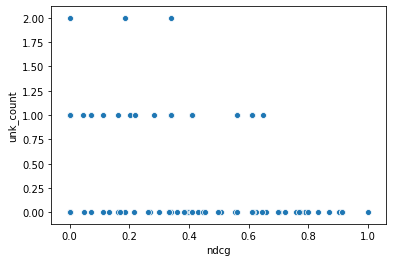

In [56]:
sns.scatterplot(df.ndcg, df.unk_count)

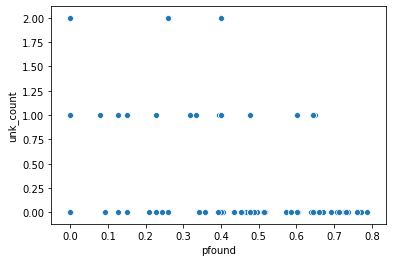

In [57]:
sns.scatterplot(df.pfound, df.unk_count)

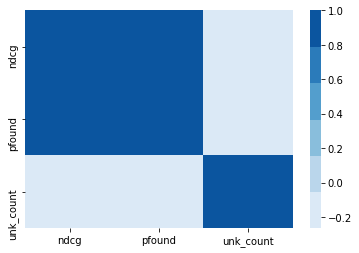

In [58]:
sns.heatmap(corr_df.corr('pearson'), cmap=sns.color_palette("Blues"))

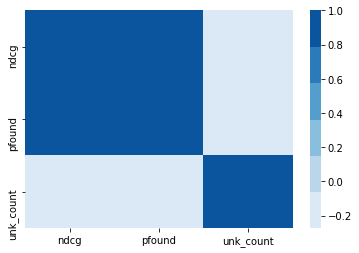

In [59]:
sns.heatmap(corr_df.corr('spearman'), cmap=sns.color_palette("Blues"))

In [60]:
print(corr_df.corr('pearson').unk_count)
print(corr_df.corr('spearman').unk_count)

ndcg        -0.263664
pfound      -0.245522
unk_count    1.000000
Name: unk_count, dtype: float64
ndcg        -0.242815
pfound      -0.271865
unk_count    1.000000
Name: unk_count, dtype: float64


In [70]:
import scipy

print(scipy.stats.pearsonr(corr_df.ndcg, corr_df.unk_count))
print(scipy.stats.pearsonr(corr_df.pfound, corr_df.unk_count))

(-0.2636642203457104, 0.009441697844462119)
(-0.2455217661098096, 0.01590322364775703)


In [71]:
print(scipy.stats.spearmanr(corr_df.ndcg, corr_df.unk_count))
print(scipy.stats.spearmanr(corr_df.pfound, corr_df.unk_count))

SpearmanrResult(correlation=-0.24281549942366962, pvalue=0.017138522108327836)
SpearmanrResult(correlation=-0.2718650534837603, pvalue=0.007373302723174495)
